## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data Introduction](#1_Data_intorduction)
  * [1.1 Objectives](#1.4_Objectives)
    * [1.1.1 Key Questions](#1.3_Imports)
  * [1.2 Product Dataset](#1.1_Product_Information)
 * [1.7 Summary](#1.7_Summary)

# 1. Data Introduction<a id='1_Data_Introduction'></a>

Sunlight Ski and Bike, a small store in Glenwood Springs, relies on sales representatives' suggestions for seasonal orders, leading to inefficient inventory management and buying due to:
* Lack of understanding of product inventory and demand.
* Unclear product categories: prioritizing or eliminating categories.
* Difficulty identifying high-demand, high-value items.
* Missed opportunities for cross-selling.

This results in:
* Stockouts for in-demand products.
* Overstocking on slow-moving items.
* Lost revenue and customer satisfaction.

## Objectives<a id='1.1_Objectives'></a>

After exploring the historic sales and product data, it was decided that the "category" of the products needed some cleaning up in order to get better reporting on which items, colors, sizes sell the best, by which prices, discounts etc. Therefore in order to gain an understanding of how to <b>optimize product inventory and sales to maximize profitability and customer satisfaction</b>, the categories (like skis, bikes, bike parts, etc) need to be reclassified, reviewed, and fixed. Once, the categories and parent categories are correctly classified then we can look at questions like:
Specific questions:
* Which products sell the best and the quickest? Which brands?  
* Which products, sizes, colors sells the most with no discounts, or full MSRP price?

And further down the road, we can look at:
* Which factors influence sales patterns (e.g., seasonality, promotions, external events)?
* How can we accurately predict future demand for specific products or categories?
* How can we personalize product recommendations to individual customers?

In [1]:
!pip install --upgrade openpyxl

In [2]:
#import libraries
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
print("Libraries Loaded")

Libraries Loaded


## 1. 1 Product Datasets<a id='#1.1_Product_Information'></a>

Let's look at the products dataset and explore/clean up the category information to get a better understanding of the types of products.

A little information about this dataset--

**Identifiers and Codes:**
ID (object): A unique identifier for each product, usually a numerical or alphanumeric code.
SKU (Stock Keeping Unit, object): A unique code used for inventory tracking and identification.
UPC (Universal Product Code, object): A barcode used for scanning and tracking products globally.
MPN (Manufacturer Part Number, object): A unique code assigned by the manufacturer to identify a specific product.
VPN (Vendor Part Number, object): A code assigned by the vendor to identify a product within their catalog.

**Product Information:**
Category (object): The category or subcategory where the product belongs.
Description (object): A detailed description of the product's features and specifications.
Keyword (object): Keywords or tags associated with the product, used for search and filtering.
EstimatedCost (float64): The estimated cost of the product to the retailer.
MSRP (Manufacturer's Suggested Retail Price, float64): The suggested retail price set by the manufacturer.

**Inventory Management:**
Quantity (int64): The current quantity of the product in stock.
Min (int64): The minimum quantity to keep in stock.
Min2 (int64): A secondary minimum quantity threshold.
Max (int64): The maximum quantity to hold in stock.
Max2 (int64): A secondary maximum quantity threshold.
IsNonInventory (bool): Indicates whether the product is a non-inventory item (not physically stocked).

**Product Attributes:**
Brand (object): The brand or manufacturer of the product.
Color (object): The color of the product.
Size (object): The size of the product, if applicable.
Location (object): The physical location where the product is stored (likely has limited use with only 2 non-null values).
Other (object): Any other relevant product attributes.
StyleNumber (object): A style number assigned by the manufacturer or vendor.
StyleName (object): A descriptive name for the product's style.
Year (object): The year the product was released or manufactured.
Gender (object): The target gender for the product.
Season (object): The season for which the product is intended (e.g., spring, summer).

**Sales and Pricing:**
Commission (float64): The commission rate earned on the sale of the product.
IsDollarCommission (bool): Indicates whether the commission is a fixed dollar amount or a percentage.
NoLabel (bool): Indicates whether the product is sold without a label.
EstimatedTime (int64): The estimated time it takes to process and ship the product.
eCommerce (bool): Indicates whether the product is available for sale online.

In [4]:
# Load datasets
products = pd.read_csv("../data/raw/Products-Mar-18.csv", encoding='latin1')

# Read the Excel file into a DataFrame
# products = pd.read_excel("../data/raw/Full-Products-March-21.xlsx")

# Optionally, view the first few rows of the DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  10000 non-null  object 
 1   MSRP         10000 non-null  object 
 2   Brand        9015 non-null   object 
 3   Sale Price   9 non-null      object 
 4   Cost         10000 non-null  object 
 5   Qty          10000 non-null  int64  
 6   UPC          9361 non-null   object 
 7   SKU          10000 non-null  object 
 8   Commission   10000 non-null  object 
 9   Keyword      9737 non-null   object 
 10  Category     6895 non-null   object 
 11  Modified At  7129 non-null   object 
 12  Size         7698 non-null   object 
 13  Color        7545 non-null   object 
 14  Other        0 non-null      float64
 15  Min          9994 non-null   float64
 16  Max          9994 non-null   float64
 17  Created At   10000 non-null  object 
dtypes: float64(3), int64(1), object(14)
memory usag

Here are all of the columns mentioned above and which type of datatype they are. It looks like we will need to convert some columns, like category, size, and color to categories. 

But first I will create a new column, called "ParentCategory", which will be an aggreagate of the category type of product the item is. This column is important for reporting and classifying products. 

In [5]:
# products.dropna(subset=['Category'])
products['Category'] = products['Category'].astype(str)

# Create an empty list to store the parent categories
parent_categories = []
for category in products['Category']:
    parts = category.split("-", 1)
    parent_category = parts[0] if len(parts) > 1 else category  # Use original if no "-"
    if parent_category == 'X':
        parent_category = 'Cross Country'
    parent_categories.append(parent_category)
    

# Add the new parent category to the DataFrame
products['ParentCategory'] = parent_categories

print(products['ParentCategory'].nunique, products['Category'].nunique)

<bound method IndexOpsMixin.nunique of 0                     nan
1                  Parts 
2                  Parts 
3                  Parts 
4       Logo Merchandise 
              ...        
9995                  nan
9996         Accessories 
9997         Accessories 
9998         Accessories 
9999         Accessories 
Name: ParentCategory, Length: 10000, dtype: object> <bound method IndexOpsMixin.nunique of 0                                             nan
1                                   Parts - Stems
2                               Parts - Seatposts
3                               Parts - Seatposts
4                      Logo Merchandise - Impulse
                          ...                    
9995                                          nan
9996                 Accessories - Winter - Socks
9997                 Accessories - Winter - Socks
9998    Accessories - Summer - Sunglasses/Goggles
9999                  Accessories - Summer - Bags
Name: Category, Length: 10000, dty

In [7]:
products['Category'] = products['Category'].astype('category')
products['Color'] = products['Color'].astype('category')
products['Size'] = products['Size'].astype('category')
products['Description'] = products['Description'].astype('string')
products['Keyword'] = products['Keyword'].astype('string')
products['UPC'] = products['UPC'].astype('string')
products['ParentCategory'] = products['ParentCategory'].astype('category')
products['Brand'] = products['Brand'].astype('category')
products['Keyword'] = products['Brand'].astype('string')
print(products['Category'].dtype)

category


Now that I have created an aggregated category column and converted the columns I want to categories and strings, I will grab only the columns that I think are important to keep in a new dataframe. I will use this dataframe to clean up the rows a bit more. 

In [10]:
clean_products = products[["Category", "Brand","Description","Keyword","UPC","MSRP","SKU","Color","Size","ParentCategory"]]

In [11]:
categories = clean_products["Category"].unique
clean_products.head()

,Category,Brand,Description,Keyword,UPC,MSRP,SKU,Color,Size,ParentCategory
0,nan,zoom,Zoom - quick comfort quill adjustable stem - 1...,zoom,SM2878,$39.99,016864,NaN,"105MM, 25.4 CLAMP",nan
1,Parts - Stems,zoom,"Zoom - quick comfort adjustable stem - 120mm, ...",zoom,SM2879,$41.99,QBP431818270,80-150D,25.4X120,Parts
2,Parts - Seatposts,zoom,Zoom - offset suspension seatpost - 27.2mm dia...,zoom,ST2915,$26.99,ZOO56514044H,NaN,"27.2MM, 350MM",Parts
3,Parts - Seatposts,zoom,Zoom - alloy quick release seat clamp - 28.6mm,zoom,ST2916,$10.99,ZOO43458359R,NaN,NaN,Parts
4,Logo Merchandise - Impulse,yesterdays,Yesterdays Large sticker,yesterdays,<NA>,$3.50,YES2252538R,NaN,NaN,Logo Merchandise


In [12]:
clean_products.tail()

,Category,Brand,Description,Keyword,UPC,MSRP,SKU,Color,Size,ParentCategory
9995,nan,NaN,Armada Ra0000240 '20-21,<NA>,<NA>,$699.99,013672,NaN,M'S 172,nan
9996,Accessories - Winter - Socks,NaN,Amari Snow pink s,<NA>,190107543941,$29.99,AMA14978265S,PINK,S,Accessories
9997,Accessories - Winter - Socks,NaN,Amari Snow pink m,<NA>,190107543958,$29.99,AMA1416028M,PINK,M,Accessories
9998,Accessories - Summer - Sunglasses/Goggles,NaN,Airspace Xpozr goggle - inj. [flo ylw] o,<NA>,191972693793,$84.95,AIR29234806O,NaN,ONE SIZE,Accessories
9999,Accessories - Summer - Bags,NaN,Accu_me_931'17piernalegwarmerblackw'smed,<NA>,018971,$84.00,ACC36569007D,BLACK,W'SMED,Accessories


It appears that there are a roughly 121,355 entries of the vendor products. This does not show what we have in inventory. This is a complete list of all of the product that we stock. 


And it looks like there are no duplicated products: 

In [13]:
clean_products.duplicated().sum()

0

In [14]:
clean_products.isnull().sum()

Category             0
Brand              985
Description          0
Keyword            985
UPC                639
MSRP                 0
SKU                  0
Color             2455
Size              2302
ParentCategory       0
dtype: int64

There are a significant amount of StyleNumbers, Size and Colors that are missing. That is okay because some of the products may not have an important color, size, or necessary styleNumber. 

In [15]:
clean_products.nunique()

Category            239
Brand               325
Description        9726
Keyword             325
UPC                9360
MSRP                672
SKU               10000
Color              1715
Size                856
ParentCategory       25
dtype: int64

In [16]:
clean_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        10000 non-null  category
 1   Brand           9015 non-null   category
 2   Description     10000 non-null  string  
 3   Keyword         9015 non-null   string  
 4   UPC             9361 non-null   string  
 5   MSRP            10000 non-null  object  
 6   SKU             10000 non-null  object  
 7   Color           7545 non-null   category
 8   Size            7698 non-null   category
 9   ParentCategory  10000 non-null  category
dtypes: category(5), object(2), string(3)
memory usage: 616.9+ KB


In [17]:
#lets look at the category column as a way to get insight on the products
unique_counts = clean_products['Category'].unique()
print(unique_counts)
# clean_products['Category'].nunique()

print(clean_products['Description'].nunique())

['nan', 'Parts - Stems', 'Parts - Seatposts', 'Logo Merchandise - Impulse', 'Clothing - Winter - Street Wear', ..., 'Clothing - Warmers', 'Accessories - Summer - Nutrition - Gels', 'Clothing', 'Clothing - Winter - Baselayer', 'Accessories - Summer - Fenders']
Length: 239
Categories (239, object): ['Accessories - Summer', 'Accessories - Summer - Bags', 'Accessories - Summer - Baskets', 'Accessories - Summer - Batteries', ..., 'X-Country Hardgoods - Boots', 'X-Country Hardgoods - Poles', 'X-Country Hardgoods - Skis', 'nan']
9726


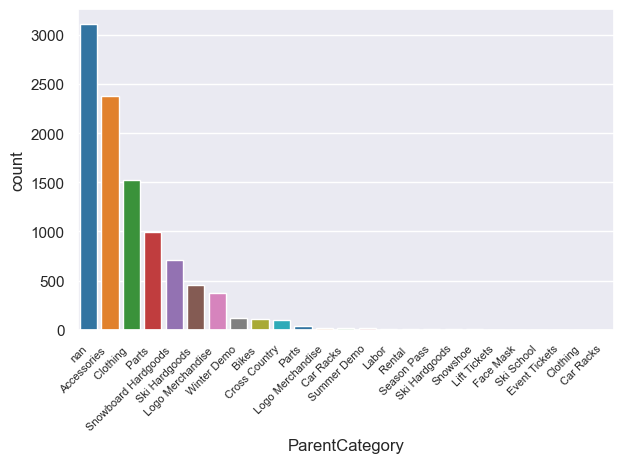

In [18]:
# Create the countplot, sorting bars by count
bar_plot = sns.countplot(
    x='ParentCategory', data=clean_products, palette='tab10', order=clean_products['ParentCategory'].value_counts().index
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Reduce label font size
plt.tick_params(axis='x', labelsize=8)  # Adjust font size as needed

# Improve spacing and visual clarity
plt.tight_layout()

plt.show()

There are so many 'nan' categorized products that I am unable to understand the distribution of products. Because most of the "nan" categorized products are old or were not purchased (sometimes we put products in the system that we never buy), I have decided to remove them. 

In [19]:
clean_products["ParentCategory"] = clean_products["ParentCategory"].astype("str")
clean_products["ParentCategory"] = clean_products["ParentCategory"].replace(["nan", "", "N/A", "<NA>"], pd.NA)

dropped_products = clean_products.loc[~clean_products.index.isin(clean_products.dropna(subset=["ParentCategory"]).index)]
print(dropped_products.head())

    Category                 Brand  \
0        nan                  zoom   
122      nan  wheels manufacturing   
123      nan  wheels manufacturing   
134      nan  wheels manufacturing   
151      nan  wheels manufacturing   

                                           Description               Keyword  \
0    Zoom - quick comfort quill adjustable stem - 1...                  zoom   
122        Wmfg Derailleur hanger 09 - fits khs models  wheels manufacturing   
123                          Wmfg Derailleur hanger 07  wheels manufacturing   
134                              Drivetrain Spacer kit  wheels manufacturing   
151                       Derailleur Hanger dropout 11  wheels manufacturing   

              UPC     MSRP           SKU Color               Size  \
0          SM2878   $39.99        016864   NaN  105MM, 25.4 CLAMP   
122  836572002612   $32.00        558825   NaN                NaN   
123  836572000458   $27.00  WMF227327697   NaN                NaN   
134  836572007

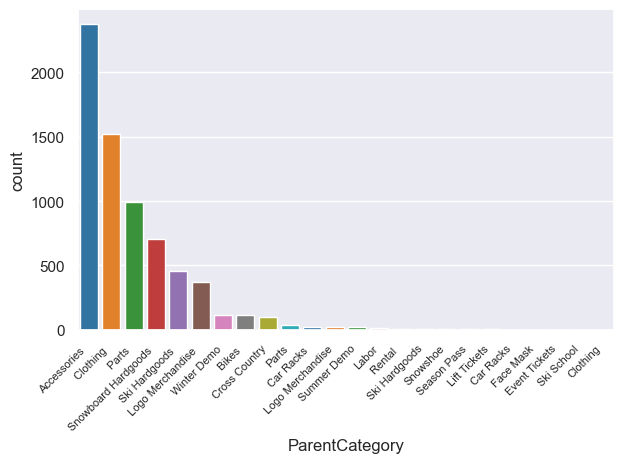

In [20]:
df_products = clean_products.dropna(subset=["ParentCategory"])

# Create the countplot, sorting bars by count
bar_plot = sns.countplot(
    x='ParentCategory', data=df_products, palette='tab10', order=df_products['ParentCategory'].value_counts().index
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Reduce label font size
plt.tick_params(axis='x', labelsize=8)  # Adjust font size as needed

# Improve spacing and visual clarity
plt.tight_layout()

plt.show()

There are some categories that I need a little bit more cleanup. I see that there are two "Logo Merchandise" categories listed. I will have to examine those and clean them.

I also see that there is a "Rental" category, which is a different than the others. I will take a peek at that one a little bit more. 

In [21]:
products.loc[products["ParentCategory"] == "Rental"]

,Description,MSRP,Brand,Sale Price,Cost,Qty,UPC,SKU,Commission,Keyword,Category,Modified At,Size,Color,Other,Min,Max,Created At,ParentCategory


Hmm. Rental Winter Helment. We don't use this system to sell those anymore, so I will drop that row. 

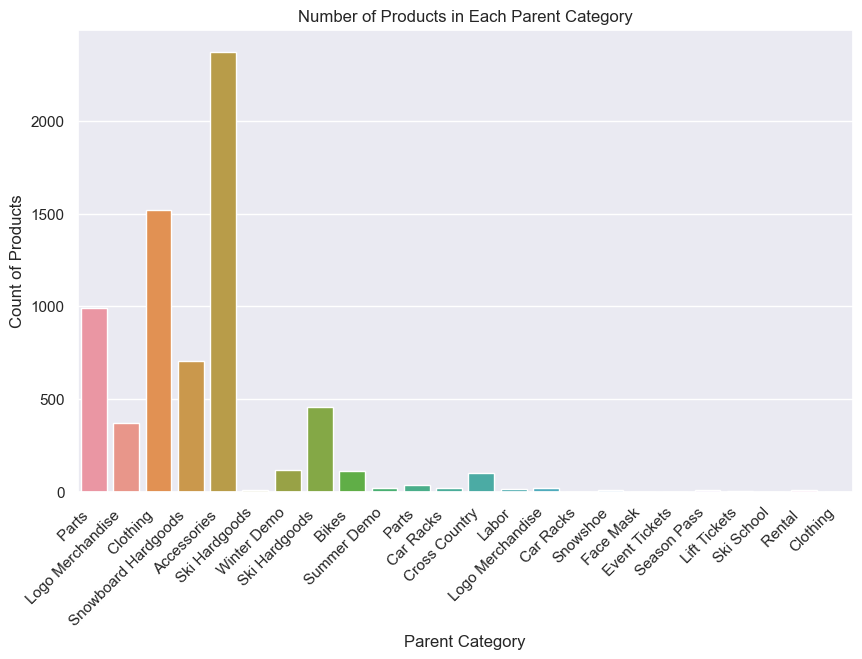

In [27]:
# Drop rows with missing values
df_products_clean = df_products.dropna()

# Plot count of products in each parent category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_products, x='ParentCategory')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Parent Category')
plt.ylabel('Count of Products')
plt.title('Number of Products in Each Parent Category')
plt.show()

In [ ]:
df_products.to_csv('../data/processed/products_2.csv', index=False, encoding='utf-8')
dropped_products.to_csv('../data/processed/no-categories-products_2.csv', index=False, encoding='utf-8')

# 1.7 Summary<a id='1.7_Summary'></a>

In reviewing the data, there were 11 columns and 121,355 rows that I decided would be useful. For the time being, I dropped rows that had "nan" as a category as I believe that data is either old or messy. I will be focusing on the 121,355 product that have categories for this project and later I can look at the uncatetgorized products once I have a category classification scheme up and running. 

There are a number of missing category values for the products, which makes it hard to run reports and see which categories and types of products sell the best at the store. In order to update the categories to a new schema that will make reporting much more straightforward, it is necessary to view the pattern in the missing category data, as well as the accuracy in the category calssification. Are the products in the correct category? And can we fix it with automatic classification. Let's find out!